In [1]:
# https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/

Abandoned as of 4/1/19, I simply don't know enough about Pandas to troubleshoot the issues in the 3rd cell. 

In [2]:
import numpy as np
import pandas as pd 
import quandl
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.dates import date2num, DateFormatter, YearLocator, MonthLocator, MONDAY
from mpl_finance import candlestick_ohlc

In [3]:
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2018,7,17)

apple, microsoft, google = (quandl.get('WIKI/' + s, start_date = start, end_date = end) for s in ['AAPL', 'MSFT', 'GOOG'])

spyderdat = pd.read_csv("~/Desktop/DataScience/Pandas/data/HistoricalQuotes.csv")
df = pd.DataFrame(spyderdat.loc[:, ["open", "high", "low", "close", "close"]].iloc[1:].values,
                                     index=pd.DatetimeIndex(spyderdat.iloc[1:, 0]),
                                     columns=["Open", "High", "Low", "Close", "Adj Close"]).sort_index()

df.head()
# spyderdat = pd.DataFrame(spyderdat.loc[:, ["open", "high", "low", "close", "close"]].iloc[1:].as_matrix(),
#                          index=pd.DatetimeIndex(spyderdat.iloc[1:, 0]),
#                          columns=["Open", "High", "Low", "Close", "Adj Close"]).sort_index()
# spyder = spyderdat.loc[start:end]
# spyder.head()

,Open,High,Low,Close,Adj Close
date,,,,,
2018-12-31,249.56,250.19,247.47,249.92,249.92
2019-01-02,245.98,251.21,245.95,250.18,250.18
2019-01-03,248.23,248.57,243.67,244.21,244.21
2019-01-04,247.59,253.11,247.17,252.39,252.39
2019-01-07,252.69,255.95,251.69,254.38,254.38


In [4]:
tbill = quandl.get("FRED/TB3MS", start_date = start, end_date = end)
rrf = tbill.iloc[-1, 0]
rrf

1.96

In [5]:
apple.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


In [6]:
google.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1092.74,1106.30,1085.15,1090.88,1640709.0,0.0,1.0,1092.74,1106.30,1085.15,1090.88,1640709.0
2018-03-22,1081.88,1082.90,1045.91,1049.08,2580374.0,0.0,1.0,1081.88,1082.90,1045.91,1049.08,2580374.0
2018-03-23,1047.03,1063.36,1021.22,1021.57,2113497.0,0.0,1.0,1047.03,1063.36,1021.22,1021.57,2113497.0
2018-03-26,1046.00,1055.63,1008.40,1053.21,2558385.0,0.0,1.0,1046.00,1055.63,1008.40,1053.21,2558385.0
2018-03-27,1063.00,1064.84,996.92,1005.10,3029471.0,0.0,1.0,1063.00,1064.84,996.92,1005.10,3029471.0


In [7]:
# apple["Adj. Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

In [8]:
stocks = pd.DataFrame({"AAPL": apple["Adj. Close"],
                      "MSFT": microsoft["Adj. Close"],
                      "GOOG": google["Adj. Close"]})

stocks = stocks.join(spyder.loc[:, "Adj Close"]).rename(columns={"Adj Close": "SPY"})
stocks.head()

NameError: name 'spyder' is not defined

In [9]:
def pandas_candlestick_ohlc(dat, stick = "day", adj = False, otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param adj: A boolean indicating whether to use adjusted prices
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
#     mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
#     alldays = DayLocator()              # minor ticks on the days
#     dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    fields = ["Open", "High", "Low", "Close"]
    if adj:
        fields = ["Adj. " + s for s in fields]
    transdat = dat.loc[:,fields]
    transdat.columns = pd.Index(["Open", "High", "Low", "Close"])
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
#     if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
#         weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
#         ax.xaxis.set_major_locator(mondays)
#         ax.xaxis.set_minor_locator(alldays)
#     else:
#         weekFormatter = DateFormatter('%b %d, %Y')
#     ax.xaxis.set_major_formatter(weekFormatter)
    ax.xaxis.set_minor_locator(MonthLocator([1, 7]))
    ax.xaxis.set_minor_formatter(DateFormatter('%b'))
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    ax.tick_params(pad=20)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), horizontalalignment='right')
 
    plt.show()

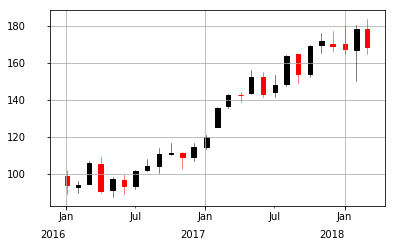

In [10]:
pandas_candlestick_ohlc(apple, adj=True, stick="month")

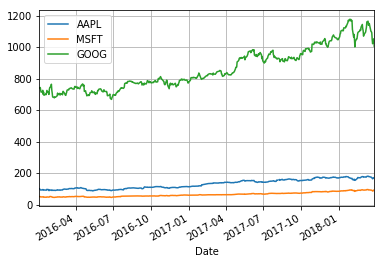

In [11]:
stocks.plot(grid=True)

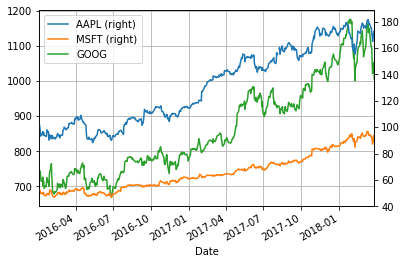

In [12]:
stocks.plot(secondary_y = ['MSFT', 'AAPL'], grid=True)

In [13]:
stock_returns = stocks.apply(lambda x: x/x[0])
stock_returns.tail() - 1

,AAPL,MSFT,GOOG
Date,,,
2018-03-21,0.682685,0.772272,0.470506
2018-03-22,0.658860,0.720722,0.414159
2018-03-23,0.620494,0.670704,0.377076
2018-03-26,0.697422,0.797185,0.419727
2018-03-27,0.653898,0.714589,0.354874


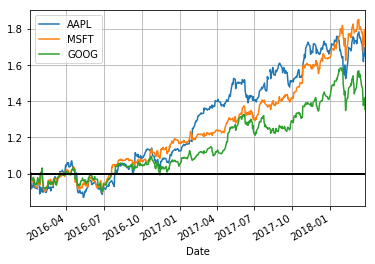

In [14]:
stock_returns.plot(grid=True).axhline(y=1, color='black', lw=2)

In [15]:
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change.tail()

,AAPL,MSFT,GOOG
Date,,,
2018-03-21,-0.022915,-0.007004,-0.006241
2018-03-22,-0.014260,-0.029519,-0.039071
2018-03-23,-0.023399,-0.029499,-0.026573
2018-03-26,0.046379,0.072977,0.030502
2018-03-27,-0.025975,-0.047048,-0.046756


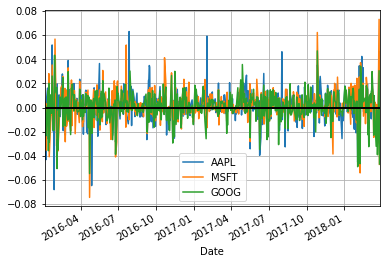

In [16]:
stock_change.plot(grid=True).axhline(y=0, color='black', lw= 2)

In [17]:
stock_change_apr = stock_change * 252 * 100
stock_change_apr.tail()

,AAPL,MSFT,GOOG
Date,,,
2018-03-21,-577.463148,-176.499833,-157.285338
2018-03-22,-359.355133,-743.873619,-984.592233
2018-03-23,-589.663945,-743.366326,-669.637836
2018-03-26,1168.762361,1839.012005,768.649993
2018-03-27,-654.582257,-1185.615651,-1178.241231


In [18]:
# stock_change_apr.drop('SPY', axis=1).corrwith(stock_change_apr.SPY)
stock_change_apr.tail()

,AAPL,MSFT,GOOG
Date,,,
2018-03-21,-577.463148,-176.499833,-157.285338
2018-03-22,-359.355133,-743.873619,-984.592233
2018-03-23,-589.663945,-743.366326,-669.637836
2018-03-26,1168.762361,1839.012005,768.649993
2018-03-27,-654.582257,-1185.615651,-1178.241231
